<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [188]:
#Download Example file
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2
### For the "Median value of owner-occupied homes" provide a boxplot

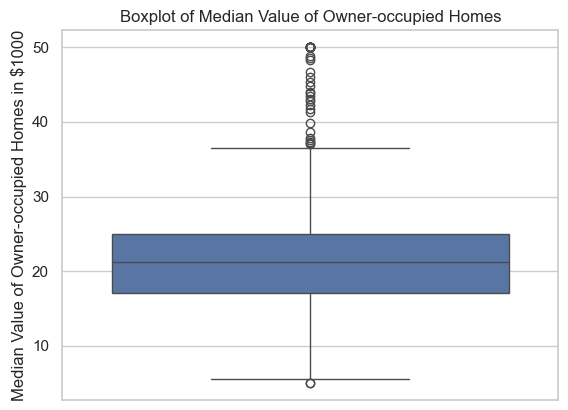

In [79]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Boxplot of Median Value of Owner-occupied Homes')
pyplot.ylabel('Median Value of Owner-occupied Homes in $1000')
pyplot.show()

### Provide a  bar plot for the Charles river variable

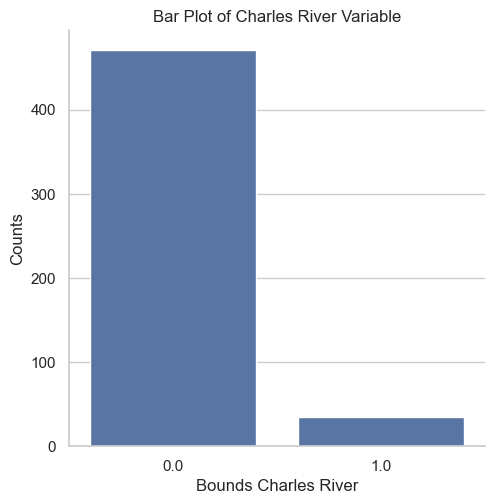

In [43]:
sns.set(style="whitegrid")
ax = sns.catplot(x ="CHAS", kind = "count", data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Bounds Charles River')
pyplot.ylabel('Counts')
pyplot.show()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64


Text(0, 0.5, 'Counts')

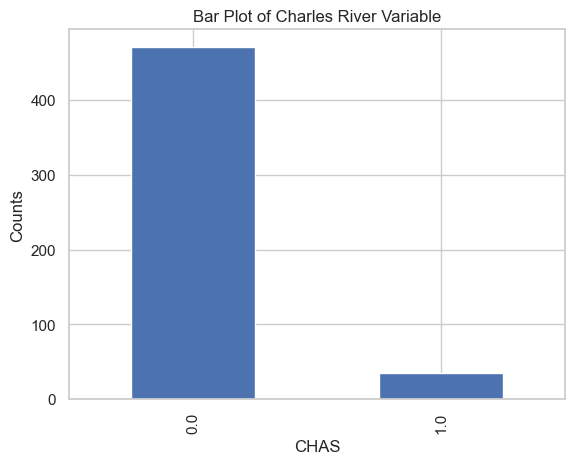

In [57]:
CHAS_counts = boston_df['CHAS'].value_counts()
print(CHAS_counts)
CHAS_counts.plot.bar(title='Bar Plot of Charles River Variable')
pyplot.ylabel('Counts')

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [66]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

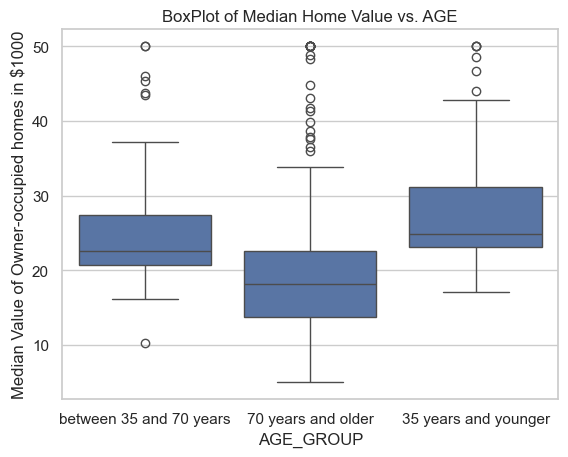

In [77]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title('BoxPlot of Median Home Value vs. AGE')
pyplot.xlabel('AGE_GROUP')
pyplot.ylabel('Median Value of Owner-occupied homes in $1000')
pyplot.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

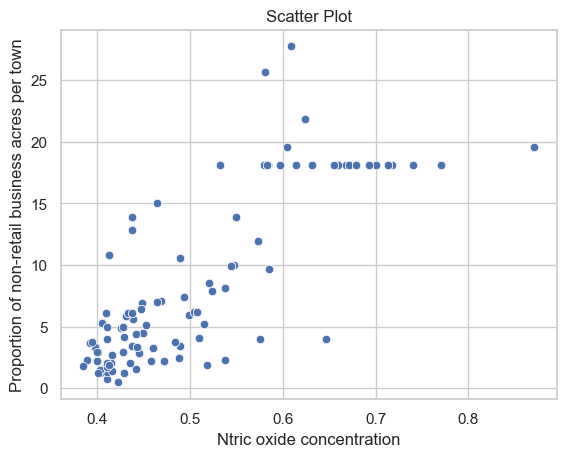

In [82]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.xlabel('Ntric oxide concentration')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.title('Scatter Plot')
pyplot.show()

<b> There is a positive correlation between Nitric oxide concentration and the proportion of non-retail business. </b>

### Create a histogram for the pupil to teacher ratio variable

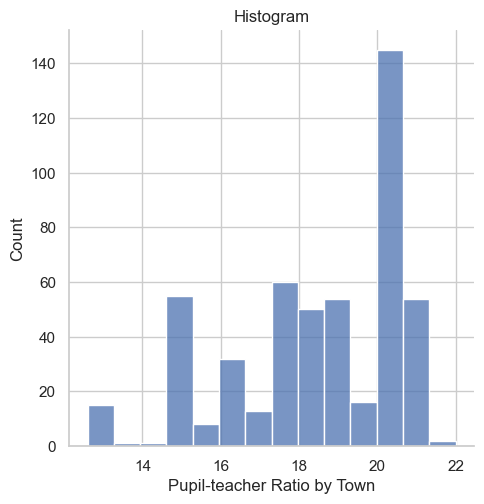

In [90]:
sns.displot(boston_df['PTRATIO']) 
pyplot.xlabel('Pupil-teacher Ratio by Town')
pyplot.title('Histogram')
pyplot.show()

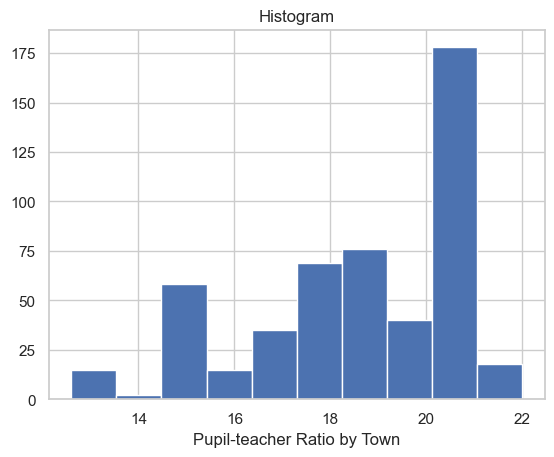

In [92]:
boston_df['PTRATIO'].hist()
pyplot.xlabel('Pupil-teacher Ratio by Town')
pyplot.title('Histogram')
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.
Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### State Hypothesis
Null Hypothesis: Median house value for Charles river bound or not are equal

Alternative Hypothesis: There is a difference in Median house value for Charles river bound or not are equal

In [160]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [163]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<b> The p-value is lower than 0.05. This rejects the NULL hypothesis and there is a statistically significant difference of median house value between houses bounded by the Charles river or not.</b>

In [121]:
X = boston_df['CHAS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           7.39e-05
Time:                        12:44:13   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> The p-value is 7.39e-05 and lower than 0.05. This rejects the NULL hypothesis and there is a statistically significant difference of median house value between houses bounded by the Charles river or not.</b>

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



#### State Hypothesis
State the Hypothesis:

*   $H\_0: µ1 = µ2 = µ3$ (The median house values are the same for the three age groups)
*   $H\_1:$ At least one of the three age groups differ

In [157]:
thirtyfive_lower_medv = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_medv = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<b> The p-value is less than 0.05 and rejects the null hypothesis and there is a difference of MEDV for different groups of AGE.</b>

In [142]:
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


<b> The p-value is less than 0.05 and rejects the null hypothesis and there is a difference of MEDV for different groups of AGE.</b>

In [151]:
## the same ANOVA test using regression
X = pd.get_dummies(boston_df[['age_group']], dtype = int)
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.71e-15
Time:                        13:06:50   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.1292      0.321     56.399      0.000      17.498      18.761
age_group_35 years and younger        9.6466      0.715     13.496      0.000       8.242      11.051
age_group_70 years and older          1.6642      0.482      3.451      0.001       0.717       2.612
age_group_between 35 and 70 years     6.8184      0.627     10.875      0.000       5.587       8.050
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                     5.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b> The p-value is less than 0.05 and rejects the null hypothesis and there is a difference of MEDV for different groups of AGE.</b>

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Proportion of on-retail business is not correlated with Nitric oxide concentration
*   $H\_1:$ Proportion of on-retail business is correlated with Nitric oxide concentration

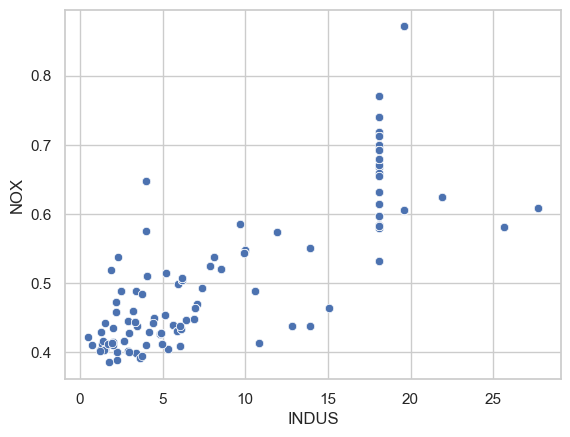

In [196]:
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [177]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

<b> The p-value is less than 0.05 and there is correlation between Nitric oxide concentration and proportion of non-retail business acres per town. </b>

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

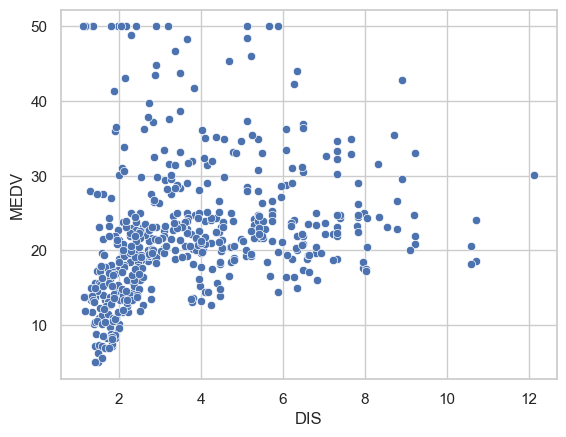

In [193]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

In [182]:
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        13:27:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>The p-value is less than 0.05 and and there is correlation between the distance to Boston employment centers to the Median house values . R-square is 0.062, R will be 0.249. There is a weak positive correlation between the distance to Boston employment centers to the Median house values </b>